In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from collections import deque # an efficient way to store the curve
from IPython.display import HTML # provides what is necessary to have the animation run in a notebook

# Animation of De Casteljau algorithm

## Control polygon

In [3]:
cpol = np.array([(0,0), (1,2), (2,2), (3,1)])

## Calculation of the De Casteljau polygons

In [4]:
def dif(points, t):
# points is an np array containing the current control polygon
# dif returns an np array of Y(t) where
# [0,1] --> R²
# Y(t) = t*Ai + (1-t)*Ai+1
    return np.array([((1-t)*points[i] + t*points[i+1]) for i in range(len(points)-1)])

def deCasteljau_nth(control, n:int, t):
    P = control
    for i in range(n):
        P=dif(P,t)

    return P

## Animation and plotting functions

In [5]:
def animate(frame):
    if frame == 0:
        history_bezier_x.clear()
        history_bezier_y.clear()

    polygon_plotter(frame, cpol)
    bezier_curve.set_data(history_bezier_x,history_bezier_y)

    return bezier_curve, *plotted_polygons

In [6]:
def polygon_plotter(t, control):
# polygon_plotter sets the data of all the polygon from the de casteljau algorithm

    for i in range(1,len(control)):
        Qi = deCasteljau_nth(control,i,t)
        plotted_polygons[i-1].set_data(Qi[:,0], Qi[:,1])
        if i == nbCasteljau:
            history_bezier_x.append(Qi[:,0])
            history_bezier_y.append(Qi[:,1])

## Plotting and animation initializations

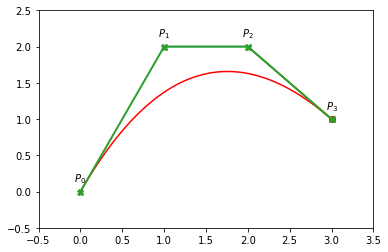

In [7]:
# control polygon
nbCasteljau = len(cpol) - 1
history_bezier_x, history_bezier_y = deque(), deque()

fig, ax = plt.subplots()
ax.set_xlim((min(cpol[:,0])-0.5), max(cpol[:,0])+0.5)
ax.set_ylim((min(cpol[:,1])-0.5), max(cpol[:,1])+0.5)

######## Creates the line2D objects that will represent the deCasteljau polygons and the Bezier Curve ############
#
plotted_polygons = [None] * nbCasteljau

# This for loop Creates all the polygons exept the last, which we aply a different style to : a red dot
for i in range(nbCasteljau - 1):
    plotted_polygons[i], = ax.plot([],[], 'x-')
plotted_polygons[nbCasteljau - 1], = ax.plot([],[], 'ro')

bezier_curve, = ax.plot([],[], 'r-')

ax.plot(cpol[:,0], cpol[:,1], 'X-', lw=2)
for i in range(len(cpol)):
    plt.annotate("$P_" + str(i) +"$",
                 cpol[i], # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

######## Launches an animation via plt.animation. animate is the function which is called for each frames specified by
#        frames.
#        We enable blitting at the end, to make the animation faster.
#

anim = FuncAnimation(fig, animate, frames=np.linspace(0,1,50), interval=100, blit=True)

HTML(anim.to_jshtml())